In [1]:
# Mounting colab on drive
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
# Enter the folder name
FOLDER_NAME = '/content/drive/My Drive/Rutgers/'

Mounted at /content/drive


In [2]:
import os
import json
import re
import matplotlib.pyplot as plt

In [3]:
postList = []
for postF in os.listdir(FOLDER_NAME + "philipino"):
  with open(FOLDER_NAME + "philipino/"+postF) as f:
    posts = f.readlines()
    for post in posts:
      post = json.loads(post)
      for ind in post['result']['posts']:
        postList.append(ind)

In [4]:
print(postList[0].keys())

print(postList[0]['postUrl'])

dict_keys(['platformId', 'platform', 'date', 'updated', 'type', 'message', 'expandedLinks', 'link', 'postUrl', 'subscriberCount', 'score', 'media', 'statistics', 'account', 'languageCode', 'legacyId', 'id'])
https://www.facebook.com/110505762353127/posts/1335801969823494


# What data can we extract?
1. Year wise trend of posting
2. Page statistics
3. Most popular terms used based on tf
4. Post statistics
5. Popular URLs (If any)
6. Popular posts -- ??
7. Topic Modelling

{'2017': 2437, '2018': 3428, '2019': 8626, '2020': 13219, '2021': 10574}


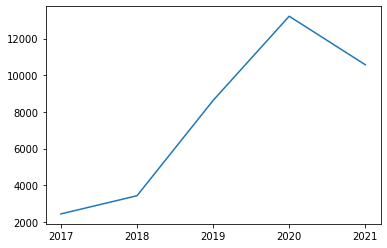

In [5]:
yearToCount = dict()
for post in postList:
  year = str(post['date'].split('-')[0])
  if year not in yearToCount.keys():
    yearToCount[year] = 0
  yearToCount[year] += 1

print(yearToCount)

x = [y for y in yearToCount.keys()]
y = [y for y in yearToCount.values()]
plt.plot(x,y)
plt.show()

{'02/2017': 139, '01/2017': 153, '03/2017': 185, '04/2017': 190, '05/2017': 174, '06/2017': 215, '07/2017': 178, '09/2017': 247, '08/2017': 196, '11/2017': 228, '10/2017': 289, '01/2018': 236, '12/2017': 243, '02/2018': 203, '03/2018': 285, '04/2018': 282, '05/2018': 246, '06/2018': 223, '07/2018': 303, '08/2018': 313, '09/2018': 289, '10/2018': 376, '11/2018': 303, '12/2018': 369, '02/2019': 414, '01/2019': 400, '03/2019': 435, '04/2019': 466, '05/2019': 463, '06/2019': 544, '08/2019': 922, '07/2019': 586, '09/2019': 1192, '11/2019': 1005, '10/2019': 1234, '12/2019': 965, '01/2020': 847, '02/2020': 849, '03/2020': 1071, '04/2020': 1303, '05/2020': 1442, '06/2020': 1269, '07/2020': 1158, '08/2020': 1076, '09/2020': 1015, '10/2020': 987, '11/2020': 1150, '12/2020': 1052, '01/2021': 1021, '02/2021': 910, '03/2021': 998, '04/2021': 775, '05/2021': 842, '06/2021': 889, '08/2021': 694, '07/2021': 873, '09/2021': 719, '10/2021': 913, '12/2021': 1009, '11/2021': 931}


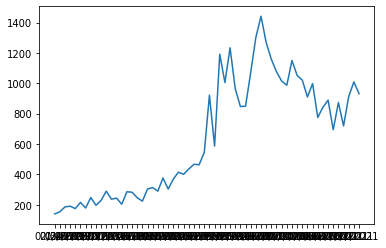

In [6]:
yearToCount = dict()
for post in postList:
  Month = str(post['date'].split('-')[1])
  year = str(post['date'].split('-')[0])
  year = Month+'/'+year
  if year not in yearToCount.keys():
    yearToCount[year] = 0
  yearToCount[year] += 1

print(yearToCount)

x = [y for y in yearToCount.keys()]
y = [y for y in yearToCount.values()]
plt.plot(x,y)
plt.show()

In [7]:
PageStats = dict()

for post in postList:
  page = post['account']['name']
  if page not in PageStats.keys():
    PageStats[page] = dict()
    PageStats[page]['subsCount'] = post['account']['subscriberCount']
    PageStats[page]['PostCount'] = 0
  PageStats[page]['PostCount'] += 1

print(PageStats)

{'Filipino Community of Anchorage, Alaska, Inc. (FCAA)': {'subsCount': 1023, 'PostCount': 50}, 'Filipino Sa Abroad': {'subsCount': 16437, 'PostCount': 378}, 'Nafcon National Alliance for Filipino Concerns': {'subsCount': 4412, 'PostCount': 122}, 'Eskabo Daan Filipino Martial Arts': {'subsCount': 8464, 'PostCount': 520}, 'Filipino Asian Basketball': {'subsCount': 2438, 'PostCount': 1055}, 'Filipinos In Alliance @ the University of Illinois at Chicago': {'subsCount': 1738, 'PostCount': 278}, 'RADYO FILIPINO AMERIKA(San Diego, California)': {'subsCount': 3886, 'PostCount': 86}, 'FLORIDA PINOY!!!': {'subsCount': 9476, 'PostCount': 1308}, 'Los Angeles Doce Pares Eskrima': {'subsCount': 3589, 'PostCount': 640}, "Chicago's Filipino Community": {'subsCount': 766, 'PostCount': 5}, 'Filipino-American Community Center Bremerton': {'subsCount': 829, 'PostCount': 229}, 'Sinag-tala Filipino Theater and Performing Arts Association': {'subsCount': 1009, 'PostCount': 59}, 'Filipino American Historical 

In [8]:
srt = list(sorted(PageStats.items(), key=lambda item: item[1]['subsCount'], reverse=True))

n = 10
print("Top {} channels based on subscriber count".format(n))
for i in srt[0:9]:
  print(i)

Top 10 channels based on subscriber count
('Filipino Food & Recipes Az', {'subsCount': 212794, 'PostCount': 13459})
('Filipinos in Los Angeles & Southern California', {'subsCount': 34442, 'PostCount': 266})
('Philippine Consulate General in San Francisco', {'subsCount': 26239, 'PostCount': 400})
('Las Vegas Filipino-Americans', {'subsCount': 23331, 'PostCount': 321})
('Philippine Consulate General in Los Angeles', {'subsCount': 20659, 'PostCount': 452})
('Philippine Consulate General in New York', {'subsCount': 19396, 'PostCount': 473})
('Filipino Law Group', {'subsCount': 18373, 'PostCount': 672})
('Filipino Sa Abroad', {'subsCount': 16437, 'PostCount': 378})
('FILIPINOS LAS VEGAS FOODIES & CONNECTIONS ATBP!', {'subsCount': 13088, 'PostCount': 1318})


In [9]:
srt = list(sorted(PageStats.items(), key=lambda item: item[1]['PostCount'], reverse=True))

n = 10
print("Top {} channels based on Post count".format(n))
for i in srt[0:9]:
  print(i)

Top 10 channels based on Post count
('Filipino Food & Recipes Az', {'subsCount': 212794, 'PostCount': 13459})
('Fil-Am International Baptist Church of Arizona', {'subsCount': 995, 'PostCount': 3243})
('FILIPINOS LAS VEGAS FOODIES & CONNECTIONS ATBP!', {'subsCount': 13088, 'PostCount': 1318})
('FLORIDA PINOY!!!', {'subsCount': 9476, 'PostCount': 1308})
('Filipino Asian Basketball', {'subsCount': 2438, 'PostCount': 1055})
('Filipino Law Group', {'subsCount': 18373, 'PostCount': 672})
('FILIPINO RADIO PROGRAM - KNDI 1270 AM in Honolulu, Hawaii', {'subsCount': 1570, 'PostCount': 649})
('Los Angeles Doce Pares Eskrima', {'subsCount': 3589, 'PostCount': 640})
('Filipinos of Dallas/Fort Worth, Texas', {'subsCount': 4384, 'PostCount': 635})


In [10]:
from gensim.parsing.preprocessing import remove_stopwords

wordCount = dict()
txt = ""

for post in postList:
  try:
    text = post['message']
    text = re.sub(r'http\S+', '', text)
    res = re.sub(r'[^\w\s]', ' ', text)
    res = remove_stopwords(res)
    txt += res + " "
    words = res.split()
    for word in words:
      if word not in wordCount.keys() and len(word)>1:
        wordCount[word] = 0
      wordCount[word] += 1
  except:
    continue
print(wordCount)

# Most frequent n words
n = 10
dct = sorted(wordCount, key=wordCount.get, reverse=True)[:n]
for word in dct:
  print("{} - {}".format(word, wordCount[word]))

{'Please': 620, 'join': 304, 'celebrate': 143, 'Seat': 1, 'limited': 47, 'pls': 123, 'register': 53, 'early': 65, 'President': 193, 'Rodrigo': 12, 'NAFCON': 61, 'Migrante': 21, 'Anakbayan': 14, 'East': 43, 'Bay': 108, 'Resistance': 13, 'ResistTrumpTuesdays': 1, 'today': 466, 'Oakland': 36, 'calling': 15, 'end': 65, 'deportations': 9, 'Below': 18, 'message': 162, 'solidarity': 43, 'The': 2158, 'Filipino': 3059, 'immigrant': 37, 'community': 534, 'stands': 24, 'add': 93, 'voices': 11, 'demand': 33, 'We': 2101, 'condemn': 12, 'Trump': 86, 'administration': 14, 'plan': 50, 'strengthen': 13, 'immigration': 37, 'enforcement': 11, 'hire': 12, '10': 468, '000': 55, 'agents': 8, 'defund': 1, 'cities': 10, 'sanctuary': 5, 'deport': 2, 'undocumented': 12, 'immigrants': 30, 'Master': 108, 'Salvador': 20, 'Caballero': 9, 'town': 37, 'filipinomartialarts': 149, 'sf': 84, 'arnis': 160, 'escrima': 146, 'eskrima': 156, 'kali': 155, 'sanfrancisco': 76, 'selfdefense': 116, 'martialarts': 115, 'Special': 

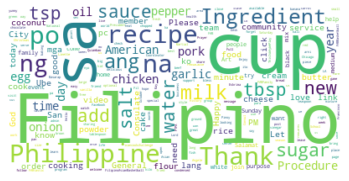

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

word_cloud = WordCloud(collocations = False, background_color = 'white', max_words=1000).generate(txt)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
import statistics

stats = dict()
for post in postList:
  post = post['statistics']['actual']
  for typ in post.keys():
    if typ not in stats.keys():
      stats[typ] = []
    stats[typ].append(post[typ])

for key in stats.keys():
  print("Name - {} Mean - {} SD - {}".format(key, statistics.mean(stats[key]), statistics.pstdev(stats[key])))

Name - likeCount Mean - 41.82321596489395 SD - 72.15146978505877
Name - shareCount Mean - 15.408316790304044 SD - 757.0465872333524
Name - commentCount Mean - 11.357433914951416 SD - 73.46939984276716
Name - loveCount Mean - 4.747231219308327 SD - 28.64526707484297
Name - wowCount Mean - 1.8396719256086094 SD - 5.832980609491679
Name - hahaCount Mean - 0.4816633580608087 SD - 4.731198258095587
Name - sadCount Mean - 0.2416936579249817 SD - 4.291935907983837
Name - angryCount Mean - 0.09379897607355553 SD - 1.851010504595664
Name - thankfulCount Mean - 0 SD - 0.0
Name - careCount Mean - 0.14267056733883607 SD - 1.214257384042866


In [13]:
PostStats = dict()
for post in postList:
  PostStats[post['postUrl']] = 0
  poststats = post['statistics']['actual']
  for typ in poststats.keys():
    PostStats[post['postUrl']] += poststats[typ]
srt = list(sorted(PostStats.items(), key=lambda item: item[1], reverse=True))
print(srt[0:10])

[('https://www.facebook.com/486963698068134/posts/2422586764505808', 151394), ('https://www.facebook.com/groups/678372948894511/permalink/4461855567212878', 15275), ('https://www.facebook.com/189510154424369/posts/508811190462922', 15231), ('https://www.facebook.com/486963698068134/posts/2499571643473986', 7654), ('https://www.facebook.com/486963698068134/posts/2959913344106478', 5788), ('https://www.facebook.com/102973888016382/posts/306029680858827', 5268), ('https://www.facebook.com/189510154424369/posts/1888765604498807', 5081), ('https://www.facebook.com/175914735725/posts/10156716886450726', 4445), ('https://www.facebook.com/102973888016382/posts/256304935870448', 3591), ('https://www.facebook.com/102973888016382/posts/327387709032586', 3487)]


In [14]:
URLs = dict()

for post in postList:
  try:
    post = post['expandedLinks']

    for link in post:
      url = link['original']
      if url not in URLs.keys():
        URLs[url] = 0
      URLs[url] += 1
  except:
    continue

# Most frequent n words
n = 15
dct = sorted(URLs, key=URLs.get, reverse=True)[:n]
for word in dct:
  print("{} - {}".format(word, URLs[word]))

www.filfestusa.com - 75
https://www.youtube.com/channel/UCl8PGjUeNzTiTgA7CC38wbw - 49
https://faccgla.org/membership-sign-up/#join - 48
www.faccgla.org. - 41
Http://www.LADocePares.com - 39
https://www.youtube.com/channel/UCfYaV0EwCL9U946lD76pkTQ - 37
https://www.youtube.com/c/TasteBudsPH?sub_confirmation=1 - 36
bit.ly/filamchamberchat - 31
http://www.youtube.com/c/JamichaKitchen - 26
https://www.facebook.com/groups/544381566302237/?ref=share - 24
https://www.activityhero.com/biz/eskabo-daan - 22
www.gmcastrotour.weebly.com - 20
http://bit.ly/PanlasangPinoyInstagram - 20
http://bit.ly/PanlasangPinoyCom - 20
http://bit.ly/PanlasangPinoyFacebook - 20


In [15]:
URLs = dict()

for post in postList:
  try:
    link = post['postUrl']

    url = link
    if url not in URLs.keys():
      URLs[url] = 0
    URLs[url] += 1
  except:
    continue

# Most frequent n words
n = 15
dct = sorted(URLs, key=URLs.get, reverse=True)[:n]
for word in dct:
  print("{} - {}".format(word, URLs[word]))

https://www.facebook.com/189510154424369/posts/2908868055821885 - 2
https://www.facebook.com/groups/438083466204391/permalink/2483687904977260 - 2
https://www.facebook.com/116401278484107/posts/1095003133957245 - 2
https://www.facebook.com/215668811924465/posts/1218056751685661 - 2
https://www.facebook.com/1472938046126368/posts/2217872514966247 - 2
https://www.facebook.com/166660480206262/posts/1554129294792700 - 2
https://www.facebook.com/groups/1105150152877177/permalink/2413334815392031 - 2
https://www.facebook.com/groups/460642467456075/permalink/1187865068067141 - 2
https://www.facebook.com/145607318979726/posts/1129914637215651 - 2
https://www.facebook.com/76086272114/posts/10156156912327115 - 2
https://www.facebook.com/238871529649628/posts/1059671087569664 - 2
https://www.facebook.com/293893073985760/posts/2804491762925866 - 2
https://www.facebook.com/293893073985760/posts/355870558453366 - 2
https://www.facebook.com/238871529649628/posts/1035467579990015 - 2
https://www.faceb

In [16]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])


data_words = []
for post in postList:
  try:
    text = post['message']
    text = re.sub(r'http\S+', '', text)
    res = re.sub(r'[^\w\s]', ' ', text)
    res = remove_stopwords(res)
    data_word = simple_preprocess(res)
    data_word = [word for word in data_word if word not in stop_words]
    data_words.append(data_word)
  except:
    continue

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
import gensim.corpora as corpora

id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]

In [18]:
from pprint import pprint
import warnings
# number of topics
num_topics = 10
# Build LDA model
with warnings.catch_warnings():
  warnings.simplefilter("ignore")
  lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                        id2word=id2word,
                                        num_topics=num_topics)
  # Print the Keyword in the 10 topics
  pprint(lda_model.print_topics())
  doc_lda = lda_model[corpus]

[(0,
  '0.013*"cream" + 0.012*"optional" + 0.011*"leche" + 0.011*"cake" + '
  '0.010*"flan" + 0.009*"ube" + 0.009*"ptpa" + 0.007*"purpose" + 0.006*"milk" '
  '+ 0.005*"powdered"'),
 (1,
  '0.038*"po" + 0.027*"sa" + 0.022*"na" + 0.014*"pm" + 0.012*"mga" + '
  '0.011*"ng" + 0.011*"thank" + 0.009*"available" + 0.009*"admin" + '
  '0.008*"order"'),
 (2,
  '0.032*"cup" + 0.018*"recipe" + 0.018*"ingredients" + 0.015*"tsp" + '
  '0.015*"milk" + 0.014*"sugar" + 0.013*"tbsp" + 0.011*"salt" + 0.011*"sauce" '
  '+ 0.010*"pcs"'),
 (3,
  '0.011*"filipino" + 0.009*"philippine" + 0.007*"consulate" + 0.007*"general" '
  '+ 0.006*"community" + 0.006*"services" + 0.005*"consular" + '
  '0.005*"philippines" + 0.005*"city" + 0.004*"san"'),
 (4,
  '0.014*"filipino" + 0.007*"general" + 0.006*"philippine" + '
  '0.006*"philippines" + 0.006*"time" + 0.006*"new" + 0.006*"american" + '
  '0.005*"pm" + 0.005*"abroad" + 0.004*"join"'),
 (5,
  '0.045*"sa" + 0.027*"na" + 0.022*"ng" + 0.021*"ang" + 0.017*"mo" + '
  

In [19]:
# Proportion of relevant topics
importantTerms = ['filipino', 'philipine', 'general', 'consulate', 'american', 'community', 'usa', 'philippines', 'services', 'vegas']

pres = 0
tot = 0
for post in data_words:
  tot += 1
  pres += (len([f for f in importantTerms if f in post])>0)

In [20]:
print("Fraction - {}".format(float(pres)/tot))

Fraction - 0.2111121474986786


In [21]:
!pip install pyLDAvis

In [22]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join(FOLDER_NAME+'lda_preped_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, FOLDER_NAME+"LDA"+ str(num_topics) +'.html')
LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.311106 -0.037145       1        1  24.313927
4     -0.193987 -0.030602       2        1  14.350357
3     -0.192688 -0.052807       3        1  14.248892
1      0.087492 -0.222545       4        1  10.246378
8     -0.107605  0.007147       5        1   8.750296
7     -0.139367  0.073349       6        1   6.241963
9      0.056254  0.242727       7        1   5.837805
0      0.175596  0.153495       8        1   5.720603
5      0.073199 -0.167976       9        1   5.472909
6     -0.069998  0.034357      10        1   4.816870, topic_info=        Term         Freq        Total Category  logprob  loglift
1040      sa  6282.000000  6282.000000  Default  30.0000  30.0000
2939     cup  7577.000000  7577.000000  Default  29.0000  29.0000
1174      po  4388.000000  4388.000000  Default  28.0000  28.0000
1780      na  5587.000000  5587.000000  Default  27.0000  27.0000
2857      ng  3990.000000  3990.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
38      good   133.392004  1304.130734  Topic10  -5.8328   0.7530
4     please   130.074441  1861.603804  Topic10  -5.8580   0.3720
49      like   128.628959  1712.593815  Topic10  -5.8691   0.4442
1239   happy   124.225378  1552.734845  Topic10  -5.9040   0.5074
160     know   120.430529  1231.794793  Topic10  -5.9350   0.7079

[751 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
38951      2  0.018435  abellon
38951      8  0.940175  abellon
38951     10  0.018435  abellon
85         1  0.001363   abroad
85         2  0.845098   abroad
...      ...       ...      ...
10596      1  0.027900     zone
10596      6  0.969527     zone
7517       3  0.991789     zoom
36124      7  0.967427      𝗬𝗢𝗨
36124     10  0.023596      𝗬𝗢𝗨

[2734 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 4, 2, 9, 8, 10, 1, 6, 7])

#Chinese


In [23]:
postList = []
for postF in os.listdir(FOLDER_NAME + "chinese/chinese"):
  with open(FOLDER_NAME + "chinese/chinese/"+postF) as f:
    posts = f.readlines()
    for post in posts:
      post = json.loads(post)
      for ind in post['result']['posts']:
        postList.append(ind)

In [24]:
print(postList[0].keys())

print(postList[0]['message'])

dict_keys(['platformId', 'platform', 'date', 'updated', 'type', 'message', 'expandedLinks', 'link', 'postUrl', 'subscriberCount', 'score', 'media', 'statistics', 'account', 'videoLengthMS', 'languageCode', 'legacyId', 'id'])
恭喜新年！如果喜歡這個拜年，就與親朋好友一起分享吧！


{'2017': 5440, '2018': 6135, '2019': 8800, '2020': 10565, '2021': 8767}


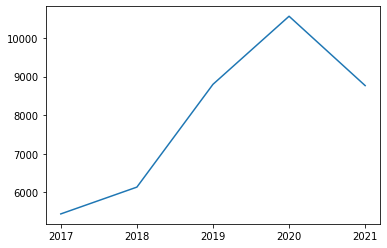

In [25]:
yearToCount = dict()
for post in postList:
  year = str(post['date'].split('-')[0])
  if year not in yearToCount.keys():
    yearToCount[year] = 0
  yearToCount[year] += 1

print(yearToCount)

x = [y for y in yearToCount.keys()]
y = [y for y in yearToCount.values()]
plt.plot(x,y)
plt.show()

{'01/2017': 400, '03/2017': 339, '04/2017': 357, '02/2017': 384, '05/2017': 425, '06/2017': 465, '07/2017': 447, '08/2017': 467, '09/2017': 518, '11/2017': 529, '10/2017': 610, '12/2017': 499, '01/2018': 559, '02/2018': 609, '04/2018': 499, '03/2018': 525, '05/2018': 529, '06/2018': 487, '07/2018': 544, '08/2018': 473, '09/2018': 458, '10/2018': 518, '11/2018': 488, '12/2018': 446, '02/2019': 598, '01/2019': 555, '03/2019': 608, '04/2019': 743, '05/2019': 786, '07/2019': 746, '06/2019': 808, '09/2019': 802, '08/2019': 884, '10/2019': 814, '11/2019': 701, '12/2019': 755, '01/2020': 811, '02/2020': 724, '03/2020': 983, '04/2020': 1333, '06/2020': 952, '05/2020': 1235, '07/2020': 875, '08/2020': 858, '09/2020': 707, '11/2020': 692, '10/2020': 748, '12/2020': 647, '01/2021': 642, '02/2021': 730, '04/2021': 684, '03/2021': 749, '05/2021': 692, '06/2021': 741, '07/2021': 786, '08/2021': 686, '09/2021': 792, '10/2021': 822, '11/2021': 702, '12/2021': 741}


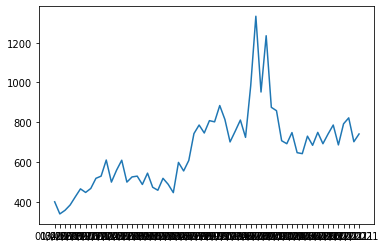

In [26]:
yearToCount = dict()
for post in postList:
  Month = str(post['date'].split('-')[1])
  year = str(post['date'].split('-')[0])
  year = Month+'/'+year
  if year not in yearToCount.keys():
    yearToCount[year] = 0
  yearToCount[year] += 1

print(yearToCount)

x = [y for y in yearToCount.keys()]
y = [y for y in yearToCount.values()]
plt.plot(x,y)
plt.show()

In [27]:
PageStats = dict()

for post in postList:
  page = post['account']['name']
  if page not in PageStats.keys():
    PageStats[page] = dict()
    PageStats[page]['subsCount'] = post['account']['subscriberCount']
    PageStats[page]['PostCount'] = 0
  PageStats[page]['PostCount'] += 1

print(PageStats)

{'今日加州 NTD TV Los Angeles': {'subsCount': 3375, 'PostCount': 657}, 'New York University': {'subsCount': 888102, 'PostCount': 1522}, 'New York State Chinese Lantern Festival': {'subsCount': 8114, 'PostCount': 64}, 'Consulate General of China in San Francisco': {'subsCount': 81492, 'PostCount': 2105}, 'Lexington Home Brands': {'subsCount': 64624, 'PostCount': 596}, 'Chinese Progressive Association': {'subsCount': 4844, 'PostCount': 291}, 'Chinese American Museum': {'subsCount': 5248, 'PostCount': 214}, 'Chinese Martial Arts - Division of Athletic Balance, LLC': {'subsCount': 1933, 'PostCount': 74}, 'Atlanta ROC Community Events': {'subsCount': 1789, 'PostCount': 13}, 'Fairbank Center for Chinese Studies, Harvard University': {'subsCount': 10216, 'PostCount': 153}, 'Chinese Progressive Association - CPA Boston': {'subsCount': 3330, 'PostCount': 159}, '菩提禪修 纽约菩提禪堂 Bodhi Meditation New York': {'subsCount': 3338, 'PostCount': 1013}, '洛杉磯 房屋翻修同好會 L.A. House Remodel': {'subsCount': 21100, 'Pos

In [28]:
srt = list(sorted(PageStats.items(), key=lambda item: item[1]['subsCount'], reverse=True))

n = 10
print("Top {} channels based on subscriber count".format(n))
for i in srt[0:9]:
  print(i)

Top 10 channels based on subscriber count
('New York University', {'subsCount': 888102, 'PostCount': 1522})
('Consulate General of China in San Francisco', {'subsCount': 81492, 'PostCount': 2105})
('Lexington Home Brands', {'subsCount': 64624, 'PostCount': 596})
('灣區去哪吃 Best Food Today 湾区美食俱乐部', {'subsCount': 34429, 'PostCount': 1211})
('紐約美食時尚達人 Foodies & Trendies Club', {'subsCount': 24074, 'PostCount': 7196})
('洛杉磯 房屋翻修同好會 L.A. House Remodel', {'subsCount': 21100, 'PostCount': 1204})
('NY4HK - New Yorkers Supporting Hong Kong', {'subsCount': 20094, 'PostCount': 414})
('旧金山湾区买房卖房租房自由版', {'subsCount': 19697, 'PostCount': 155})
('纽约!纽约! New York!', {'subsCount': 18752, 'PostCount': 114})


In [29]:
srt = list(sorted(PageStats.items(), key=lambda item: item[1]['PostCount'], reverse=True))

n = 10
print("Top {} channels based on Post count".format(n))
for i in srt[0:9]:
  print(i)

Top 10 channels based on Post count
('紐約美食時尚達人 Foodies & Trendies Club', {'subsCount': 24074, 'PostCount': 7196})
('Consulate General of China in San Francisco', {'subsCount': 81492, 'PostCount': 2105})
('New York University', {'subsCount': 888102, 'PostCount': 1522})
('Taiwan in Boston', {'subsCount': 5803, 'PostCount': 1275})
('灣區去哪吃 Best Food Today 湾区美食俱乐部', {'subsCount': 34429, 'PostCount': 1211})
('洛杉磯 房屋翻修同好會 L.A. House Remodel', {'subsCount': 21100, 'PostCount': 1204})
('Taiwan in Los Angeles-駐洛杉磯台北經濟文化辦事處', {'subsCount': 4959, 'PostCount': 1149})
('菩提禪修 纽约菩提禪堂 Bodhi Meditation New York', {'subsCount': 3338, 'PostCount': 1013})
('Sing Tao Los Angeles-洛杉磯 星島日報 / 東周刊', {'subsCount': 5166, 'PostCount': 985})


In [30]:
import statistics

stats = dict()
for post in postList:
  post = post['statistics']['actual']
  for typ in post.keys():
    if typ not in stats.keys():
      stats[typ] = []
    stats[typ].append(post[typ])

for key in stats.keys():
  print("Name - {} Mean - {} SD - {}".format(key, statistics.mean(stats[key]), statistics.pstdev(stats[key])))

Name - likeCount Mean - 55.09016042511396 SD - 192.92632436040344
Name - shareCount Mean - 7.30682247462664 SD - 75.81926658328064
Name - commentCount Mean - 9.118795174654343 SD - 28.42546424391491
Name - loveCount Mean - 4.608507316090362 SD - 30.439706774434892
Name - wowCount Mean - 1.060518296522024 SD - 5.765158346494446
Name - hahaCount Mean - 0.768126526808875 SD - 4.950044195842554
Name - sadCount Mean - 0.6505402070163951 SD - 7.692769749729791
Name - angryCount Mean - 0.3992746870828821 SD - 4.5169846751560305
Name - thankfulCount Mean - 0 SD - 0.0
Name - careCount Mean - 0.5701765431787846 SD - 9.96343733044687


In [31]:
PostStats = dict()
for post in postList:
  PostStats[post['postUrl']] = 0
  poststats = post['statistics']['actual']
  for typ in poststats.keys():
    PostStats[post['postUrl']] += poststats[typ]
srt = list(sorted(PostStats.items(), key=lambda item: item[1], reverse=True))
print(srt[0:10])

[('https://www.facebook.com/547153838718546/posts/1968376459929603', 37246), ('https://www.facebook.com/547153838718546/posts/2679546675479241', 13531), ('https://www.facebook.com/103256838688/posts/10155448764833689', 10123), ('https://www.facebook.com/240684702771002/posts/1739605049545619', 9743), ('https://www.facebook.com/547153838718546/posts/1881612701939313', 9287), ('https://www.facebook.com/277907599586242/posts/525058511537815', 8796), ('https://www.facebook.com/547153838718546/posts/498058897601004', 8689), ('https://www.facebook.com/103256838688/posts/10155160963728689', 7026), ('https://www.facebook.com/547153838718546/posts/434889107461977', 6431), ('https://www.facebook.com/103256838688/posts/10155679483463689', 5859)]


In [32]:
from gensim.parsing.preprocessing import remove_stopwords

wordCount = dict()
txt = ""

for post in postList:
  try:
    text = post['message']
    text = re.sub(r'http\S+', '', text)
    res = re.sub(r'[^\w\s]', ' ', text)
    res = remove_stopwords(res)
    txt += res + " "
    words = res.split()
    for word in words:
      if word not in wordCount.keys() and len(word)>1:
        wordCount[word] = 0
      wordCount[word] += 1
  except:
    continue

# Most frequent n words
n = 10
dct = sorted(wordCount, key=wordCount.get, reverse=True)[:n]
for word in dct:
  print("{} - {}".format(word, wordCount[word]))

The - 2270
Chinese - 2056
Taiwan - 1850
China - 1569
We - 1473
New - 1049
American - 775
NYU - 760
year - 659
This - 627


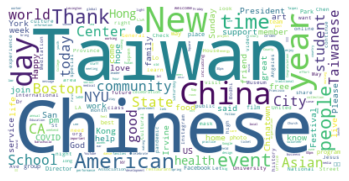

In [33]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

word_cloud = WordCloud(collocations = False, background_color = 'white', max_words=5000).generate(txt)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [34]:
URLs = dict()

for post in postList:
  try:
    post = post['expandedLinks']

    for link in post:
      url = link['original']
      if url not in URLs.keys():
        URLs[url] = 0
      URLs[url] += 1
  except:
    continue

# Most frequent n words
n = 15
dct = sorted(URLs, key=URLs.get, reverse=True)[:n]
for word in dct:
  print("{} - {}".format(word, URLs[word]))

http://bit.ly/ - 360
www.baruchucla.org - 123
www.facebook.com/baruchucla - 123
https://goo.gl/m7kJ1g - 112
YouTube｜http://bit.ly/WCu2b - 109
Instagram｜http://bit.ly/2WCins - 105
www.instagram.com/baruch_ucla/ - 76
www.snapchat.com/add/baruchucla - 76
http://t.me/CaliforniaNewz - 71
http://bit.ly/2IGNYGPS - 53
https://www.instagram.com/baruch_ucla/ - 47
http://www.facebook.com/innerlamp/ - 42
https://www.fattoriaemare.com/dessertcopy-of-menu - 41
https://www.snapchat.com/add/baruchucla - 40
www.nychineseculturalcenter.org - 36


In [35]:
URLs = dict()

for post in postList:
  try:
    link = post['postUrl']

    url = link
    if url not in URLs.keys():
      URLs[url] = 0
    URLs[url] += 1
  except:
    continue

# Most frequent n words
n = 15
dct = sorted(URLs, key=URLs.get, reverse=True)[:n]
for word in dct:
  print("{} - {}".format(word, URLs[word]))

https://www.facebook.com/124251452726/posts/10154230161602727 - 2
https://www.facebook.com/groups/1506640306285771/permalink/1845952079021257 - 2
https://www.facebook.com/949076931885039/posts/1254452908014105 - 2
https://www.facebook.com/183932731621212/posts/1677245435623260 - 2
https://www.facebook.com/groups/2200450584/permalink/10158152423745585 - 2
https://www.facebook.com/103256838688/posts/10155490175278689 - 2
https://www.facebook.com/388382951560820/posts/401949300204185 - 2
https://www.facebook.com/559417600783428/posts/1730921286966381 - 2
https://www.facebook.com/748880361946471/posts/1027143730786798 - 2
https://www.facebook.com/136887039664137/posts/1947862925233197 - 2
https://www.facebook.com/167474999170/posts/10156780741639171 - 2
https://www.facebook.com/groups/1506640306285771/permalink/2179481302334998 - 2
https://www.facebook.com/groups/1506640306285771/permalink/2207320699551058 - 2
https://www.facebook.com/groups/1506640306285771/permalink/2218746158408512 - 2


In [36]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])


data_words = []
for post in postList:
  try:
    text = post['message']
    text = re.sub(r'http\S+', '', text)
    res = re.sub(r'[^\w\s]', ' ', text)
    res = remove_stopwords(res)
    data_word = simple_preprocess(res)
    data_word = [word for word in data_word if word not in stop_words]
    data_words.append(data_word)
  except:
    continue

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
import gensim.corpora as corpora

id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]

In [38]:
from pprint import pprint
import warnings
# number of topics
num_topics = 10
# Build LDA model
with warnings.catch_warnings():
  warnings.simplefilter("ignore")
  lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                        id2word=id2word,
                                        num_topics=num_topics)
  # Print the Keyword in the 10 topics
  pprint(lda_model.print_topics())
  doc_lda = lda_model[corpus]

[(0,
  '0.007*"irvine" + 0.004*"diamond" + 0.003*"ca" + 0.003*"walnut" + '
  '0.002*"tart" + 0.002*"com" + 0.002*"pcs" + 0.002*"大家好" + 0.002*"謝謝大家" + '
  '0.002*"san"'),
 (1,
  '0.027*"taiwan" + 0.009*"new" + 0.006*"year" + 0.005*"nyu" + '
  '0.004*"taiwanese" + 0.004*"us" + 0.003*"chinese" + 0.003*"boston" + '
  '0.003*"president" + 0.003*"covid"'),
 (2,
  '0.006*"謝謝" + 0.002*"facebook" + 0.002*"virus" + 0.002*"lord" + 0.002*"保存期限" '
  '+ 0.002*"lbs" + 0.002*"instagram" + 0.002*"請依包裝上之日期為主" + 0.002*"cerritos" + '
  '0.001*"see"'),
 (3,
  '0.011*"ca" + 0.007*"pm" + 0.006*"付款方式" + 0.005*"pcs" + 0.005*"zelle" + '
  '0.004*"paypal" + 0.003*"cash" + 0.003*"開團日期" + 0.003*"arcadia" + '
  '0.003*"下午"'),
 (4,
  '0.010*"chinese" + 0.007*"american" + 0.005*"china" + 0.004*"asian" + '
  '0.004*"people" + 0.004*"day" + 0.004*"god" + 0.004*"world" + 0.004*"time" + '
  '0.004*"community"'),
 (5,
  '0.004*"pm" + 0.003*"chicken" + 0.003*"beef" + 0.002*"tofu" + 0.002*"sweet" '
  '+ 0.002*"good" + 0.002

In [39]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join(FOLDER_NAME+'lda_preped_Chinese_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, FOLDER_NAME+"LDAChinese"+ str(num_topics) +'.html')
LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.296665  0.024960       1        1  34.435355
1      0.261936  0.033751       2        1  19.666541
3     -0.161523  0.150660       3        1   9.594826
5     -0.040249 -0.019897       4        1   5.512741
7     -0.087098 -0.029717       5        1   5.499681
6     -0.046271  0.053118       6        1   5.479305
9     -0.024324 -0.012324       7        1   5.155464
8     -0.019144 -0.176960       8        1   5.109844
0     -0.075475  0.034625       9        1   4.894315
2     -0.104516 -0.058215      10        1   4.651928, topic_info=          Term         Freq        Total Category  logprob  loglift
4210    taiwan  5303.000000  5303.000000  Default  30.0000  30.0000
19832       oz   715.000000   715.000000  Default  29.0000  29.0000
4112    irvine   972.000000   972.000000  Default  28.0000  28.0000
620         ca  1197.000000  1197.000000  Default  27.0000  27.0000
70     chinese  3480.000000  3480.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
1255     first    40.105398   299.088745  Topic10  -6.8934   1.0587
7502   worship    34.614034   159.578715  Topic10  -7.0406   1.5396
620         ca    43.300971  1197.052245  Topic10  -6.8167  -0.2516
638        www    32.043076   132.759988  Topic10  -7.1178   1.6464
621        com    30.577057   722.485558  Topic10  -7.1646  -0.0946

[702 rows x 6 columns], token_table=        Topic      Freq      Term
term                             
7684        1  0.996264        ac
32640       2  0.983094  academia
57889       4  0.974265      acre
13576       1  0.552329    advent
13576       5  0.439031    advent
...       ...       ...       ...
181123      6  0.969880        𝑖𝑛
181127      6  0.976867        𝑖𝑠
181133      6  0.995747        𝑜𝑓
181139      3  0.007243       𝑡ℎ𝑒
181139      6  0.984995       𝑡ℎ𝑒

[2053 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 4, 6, 8, 7, 10, 9, 1, 3])

# Vietnamese

In [40]:
postList = []
for postF in os.listdir(FOLDER_NAME + "vietnamese/vietnamese"):
  with open(FOLDER_NAME + "vietnamese/vietnamese/"+postF) as f:
    posts = f.readlines()
    for post in posts:
      post = json.loads(post)
      for ind in post['result']['posts']:
        postList.append(ind)

In [41]:
print(postList[0].keys())

print(postList[0]['message'])

dict_keys(['platformId', 'platform', 'date', 'updated', 'type', 'message', 'expandedLinks', 'link', 'postUrl', 'subscriberCount', 'score', 'media', 'statistics', 'account', 'languageCode', 'legacyId', 'id'])
Em mới đọc bài về mấy vụ đập kiếng xe lấy đồ ở Bellaire. Em định ko đăng bài nhưng mà thôi để mọi người cảnh giác :( thứ 7 tuần rồi ox em đi làm về trễ 2am. Anh dừng xe đèn đỏ bị hai thằng một đen một Mễ chạy ra chĩa súng vô đầu lôi ra ngoài đập cho mấy phát rùi cướp chiếc xe Camry mới tinh 2018 của em hichic. Ox thì bị xây xát ở ngoài thôi, tụi em báo cảnh sát thì họ run biển số xe và tìm được xe lúc đó 5am nhưng mà chiếc xe đã bị đụng tanh banh. Em thấy không chỉ ở Bellaire mà ở đâu cũng vậy nên cẩn thận nhất là đêm khuya vắng vẻ :( ox em bị shock nên ko nhớ chính xác đường nào chỉ nhớ được khúc 610 chuẩn bị lên 59 vì ảnh làm ở hotel gần Galleria. Cẩn thận là trên hết mọi người ah 😭😭


{'2018': 9186, '2017': 7055, '2019': 17373, '2020': 47349, '2021': 48006}


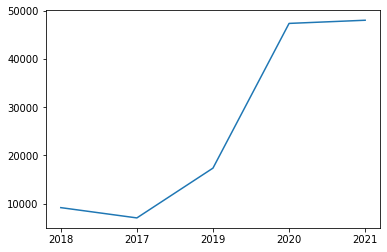

In [42]:
yearToCount = dict()
for post in postList:
  year = str(post['date'].split('-')[0])
  if year not in yearToCount.keys():
    yearToCount[year] = 0
  yearToCount[year] += 1

print(yearToCount)

x = [y for y in yearToCount.keys()]
y = [y for y in yearToCount.values()]
plt.plot(x,y)
plt.show()

{'11/2018': 1137, '03/2018': 574, '04/2018': 551, '10/2018': 1046, '02/2018': 605, '01/2018': 607, '10/2017': 602, '08/2017': 1048, '07/2017': 528, '09/2017': 837, '11/2017': 561, '12/2017': 452, '09/2018': 876, '06/2017': 405, '08/2018': 841, '04/2017': 558, '03/2017': 501, '05/2017': 451, '02/2017': 539, '01/2017': 573, '02/2019': 1143, '01/2019': 1126, '12/2018': 1094, '07/2018': 727, '06/2018': 592, '05/2018': 536, '06/2019': 1433, '05/2019': 1631, '04/2019': 1335, '03/2019': 1328, '09/2019': 1605, '08/2019': 1413, '07/2019': 1626, '01/2020': 1847, '12/2019': 1376, '11/2019': 1662, '10/2019': 1695, '04/2020': 4110, '03/2020': 3504, '02/2020': 1741, '07/2020': 5046, '06/2020': 4759, '05/2020': 4175, '11/2020': 4252, '10/2020': 4491, '09/2020': 4555, '08/2020': 5112, '02/2021': 4167, '01/2021': 4513, '12/2020': 3757, '06/2021': 3243, '05/2021': 3419, '04/2021': 3455, '03/2021': 4062, '09/2021': 3964, '08/2021': 4235, '07/2021': 3671, '12/2021': 5189, '11/2021': 4264, '10/2021': 3824}

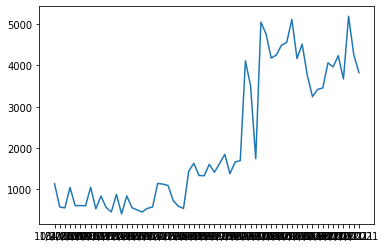

In [43]:
yearToCount = dict()
for post in postList:
  Month = str(post['date'].split('-')[1])
  year = str(post['date'].split('-')[0])
  year = Month+'/'+year
  if year not in yearToCount.keys():
    yearToCount[year] = 0
  yearToCount[year] += 1

print(yearToCount)

x = [y for y in yearToCount.keys()]
y = [y for y in yearToCount.values()]
plt.plot(x,y)
plt.show()

In [44]:
PageStats = dict()

for post in postList:
  page = post['account']['name']
  if page not in PageStats.keys():
    PageStats[page] = dict()
    PageStats[page]['subsCount'] = post['account']['subscriberCount']
    PageStats[page]['PostCount'] = 0
  PageStats[page]['PostCount'] += 1

print(PageStats)

{'Người Việt Houston': {'subsCount': 56619, 'PostCount': 15359}, 'Vietnamese Association at Seneca College - VAS': {'subsCount': 3930, 'PostCount': 1055}, 'Nước Mỹ Hôm Nay - USA Today': {'subsCount': 16037, 'PostCount': 1739}, 'PIVOT - The Progressive Vietnamese American Organization': {'subsCount': 9180, 'PostCount': 1233}, 'VINWA-Cộng đồng người Việt Nam tại Tây Úc (Vietnamese in Western Australia)': {'subsCount': 46953, 'PostCount': 10002}, 'Người Việt in North- South Carolina.': {'subsCount': 33086, 'PostCount': 756}, 'Florida Kết Nối Info': {'subsCount': 19222, 'PostCount': 5319}, 'Vietnamese Volunteers of Houston - VVofH': {'subsCount': 1367, 'PostCount': 33}, 'San Diego Tet Festival - VAYA SDTET - Mira Mesa': {'subsCount': 1302, 'PostCount': 48}, 'American Dream - Du học, Định cư,Giúp Đỡ, Cuộc sống Usa': {'subsCount': 23862, 'PostCount': 1706}, 'Món Ngon Người Việt Houston': {'subsCount': 66288, 'PostCount': 5510}, 'Vietnamese in San Jose - Người Việt ở San Jose': {'subsCount': 

In [45]:
srt = list(sorted(PageStats.items(), key=lambda item: item[1]['subsCount'], reverse=True))

n = 10
print("Top {} channels based on subscriber count".format(n))
for i in srt[0:9]:
  print(i)

Top 10 channels based on subscriber count
('Người Việt ở Mỹ (Vietnamese In The USA - VINUSA)', {'subsCount': 94385, 'PostCount': 26})
('Người Việt Cali', {'subsCount': 84974, 'PostCount': 6335})
('Người Việt California', {'subsCount': 71240, 'PostCount': 1569})
('Món Ngon Người Việt Houston', {'subsCount': 66288, 'PostCount': 5510})
('Người Việt Houston', {'subsCount': 56619, 'PostCount': 15359})
('VINWA-Cộng đồng người Việt Nam tại Tây Úc (Vietnamese in Western Australia)', {'subsCount': 46953, 'PostCount': 10002})
('Du Lịch - Cảnh Đẹp - CALIFORNIA 🇺🇸', {'subsCount': 45358, 'PostCount': 1271})
('Người Việt Seattle - Washington', {'subsCount': 36646, 'PostCount': 246})
('Người Việt in North- South Carolina.', {'subsCount': 33086, 'PostCount': 756})


In [46]:
srt = list(sorted(PageStats.items(), key=lambda item: item[1]['PostCount'], reverse=True))

n = 10
print("Top {} channels based on Post count".format(n))
for i in srt[0:9]:
  print(i)

Top 10 channels based on Post count
('Người Việt Houston', {'subsCount': 56619, 'PostCount': 15359})
('VINWA-Cộng đồng người Việt Nam tại Tây Úc (Vietnamese in Western Australia)', {'subsCount': 46953, 'PostCount': 10002})
('Người Việt Cali', {'subsCount': 84974, 'PostCount': 6335})
('Món Ngon Người Việt Houston', {'subsCount': 66288, 'PostCount': 5510})
('Florida Kết Nối Info', {'subsCount': 19222, 'PostCount': 5319})
('Hội người Việt ở Massachusetts', {'subsCount': 24582, 'PostCount': 4155})
('Ăn vặt San Jose', {'subsCount': 24499, 'PostCount': 3848})
('Vietnamese in San Jose - Người Việt ở San Jose', {'subsCount': 3571, 'PostCount': 3452})
('Atlanta Vietnamese Photography Association (AVNPA)', {'subsCount': 316, 'PostCount': 3322})


In [47]:
import statistics

stats = dict()
for post in postList:
  post = post['statistics']['actual']
  for typ in post.keys():
    if typ not in stats.keys():
      stats[typ] = []
    stats[typ].append(post[typ])

for key in stats.keys():
  print("Name - {} Mean - {} SD - {}".format(key, statistics.mean(stats[key]), statistics.pstdev(stats[key])))

Name - likeCount Mean - 32.392210531212925 SD - 95.31300884368936
Name - shareCount Mean - 7.087137219021625 SD - 74.55793170271603
Name - commentCount Mean - 22.892563329172127 SD - 65.94753310078883
Name - loveCount Mean - 3.6957563445479145 SD - 49.67175681790415
Name - wowCount Mean - 0.8729772270855787 SD - 4.5323539087823965
Name - hahaCount Mean - 2.6923989485845436 SD - 16.65070727047751
Name - sadCount Mean - 1.2029169800494692 SD - 11.219253828351544
Name - angryCount Mean - 0.3587451247974319 SD - 3.43446801675694
Name - thankfulCount Mean - 0 SD - 0.0
Name - careCount Mean - 0.3464631035365088 SD - 4.30107744426987


In [48]:
PostStats = dict()
for post in postList:
  PostStats[post['postUrl']] = 0
  poststats = post['statistics']['actual']
  for typ in poststats.keys():
    PostStats[post['postUrl']] += poststats[typ]
srt = list(sorted(PostStats.items(), key=lambda item: item[1], reverse=True))
print(srt[0:10])

[('https://www.facebook.com/334762520011381/posts/1061108434043449', 46609), ('https://www.facebook.com/100063625571166/posts/244175387713312', 21007), ('https://www.facebook.com/254886287991089/posts/2390279427785087', 17723), ('https://www.facebook.com/100063625571166/posts/154877109976474', 12940), ('https://www.facebook.com/334762520011381/posts/1641761355978151', 12299), ('https://www.facebook.com/254886287991089/posts/2397186130427750', 11870), ('https://www.facebook.com/334762520011381/posts/1072189179602041', 11283), ('https://www.facebook.com/384995688823118/posts/446676639321689', 10902), ('https://www.facebook.com/254886287991089/posts/2384047005074996', 10337), ('https://www.facebook.com/384995688823118/posts/906008590055156', 9223)]


In [49]:
from gensim.parsing.preprocessing import remove_stopwords

wordCount = dict()
txt = ""

for post in postList:
  try:
    text = post['message']
    text = re.sub(r'http\S+', '', text)
    res = re.sub(r'[^\w\s]', ' ', text)
    res = remove_stopwords(res)
    txt += res + " "
    words = res.split()
    for word in words:
      if word not in wordCount.keys() and len(word)>1:
        wordCount[word] = 0
      wordCount[word] += 1
  except:
    continue

# Most frequent n words
n = 10
dct = sorted(wordCount, key=wordCount.get, reverse=True)[:n]
for word in dct:
  print("{} - {}".format(word, wordCount[word]))

có - 31897
em - 29515
cho - 26986
người - 26165
và - 18876
mình - 18220
nhà - 16508
không - 13927
là - 13818
làm - 12420


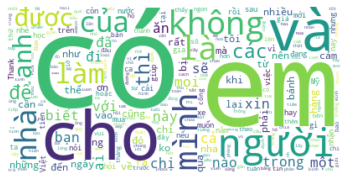

In [50]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

word_cloud = WordCloud(collocations = False, background_color = 'white', max_words=5000).generate(txt)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [51]:
URLs = dict()

for post in postList:
  try:
    post = post['expandedLinks']

    for link in post:
      url = link['original']
      if url not in URLs.keys():
        URLs[url] = 0
      URLs[url] += 1
  except:
    continue

# Most frequent n words
n = 15
dct = sorted(URLs, key=URLs.get, reverse=True)[:n]
for word in dct:
  print("{} - {}".format(word, URLs[word]))

https://www.facebook.com/Bonbon-bedding-1724008514557693/ - 172
https://www.bonbonbedding.com - 118
https://www.facebook.com/fearlessfemaleleader/videos/1216353165369226/ - 49
https://www.bonbonbedding.com/ - 45
http://order.lukitchen.com - 43
$3.5/lb - 23
https://www.facebook.com/photo.php?fbid=10220386390023182&set=gm.309850963640305&type=3 - 20
https://www.facebook.com/photo.php?fbid=2190173864460726&set=gm.430840784489879&type=3 - 19
https://www.facebook.com/photo.php?fbid=10220242409903769&set=gm.295151771776891&type=3 - 18
$1.25/cu - 18
$5.99/lb - 17
$0.50/c - 16
$2.50/c - 16
www.gaokitchen.com - 15
https://www.facebook.com/photo.php?fbid=10220384639059409&set=gm.308839453741456&type=3 - 15


In [52]:
URLs = dict()

for post in postList:
  try:
    link = post['postUrl']

    url = link
    if url not in URLs.keys():
      URLs[url] = 0
    URLs[url] += 1
  except:
    continue

# Most frequent n words
n = 15
dct = sorted(URLs, key=URLs.get, reverse=True)[:n]
for word in dct:
  print("{} - {}".format(word, URLs[word]))

https://www.facebook.com/groups/472865172737572/permalink/1905299486160793 - 2
https://www.facebook.com/groups/2204109836/permalink/10156347394294837 - 2
https://www.facebook.com/groups/607370389338101/permalink/1909179042490556 - 2
https://www.facebook.com/groups/472865172737572/permalink/1860492600641482 - 2
https://www.facebook.com/groups/472865172737572/permalink/1861521823871893 - 2
https://www.facebook.com/groups/607370389338101/permalink/1822207017854426 - 2
https://www.facebook.com/groups/607370389338101/permalink/1793925497349245 - 2
https://www.facebook.com/groups/1464510313566960/permalink/1981632201854766 - 2
https://www.facebook.com/groups/607370389338101/permalink/1793695530705575 - 2
https://www.facebook.com/groups/472865172737572/permalink/1801357846554958 - 2
https://www.facebook.com/253180844708847/posts/2072061686154078 - 2
https://www.facebook.com/groups/472865172737572/permalink/1800690356621707 - 2
https://www.facebook.com/groups/607370389338101/permalink/17944627

In [53]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])


data_words = []
for post in postList:
  try:
    text = post['message']
    text = re.sub(r'http\S+', '', text)
    res = re.sub(r'[^\w\s]', ' ', text)
    res = remove_stopwords(res)
    data_word = simple_preprocess(res)
    data_word = [word for word in data_word if word not in stop_words]
    data_words.append(data_word)
  except:
    continue

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
import gensim.corpora as corpora

id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]

In [55]:
from pprint import pprint
import warnings
# number of topics
num_topics = 10
# Build LDA model
with warnings.catch_warnings():
  warnings.simplefilter("ignore")
  lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                        id2word=id2word,
                                        num_topics=num_topics)
  # Print the Keyword in the 10 topics
  pprint(lda_model.print_topics())
  doc_lda = lda_model[corpus]

[(0,
  '0.066*"em" + 0.034*"có" + 0.027*"cho" + 0.024*"anh" + 0.024*"chị" + '
  '0.021*"người" + 0.018*"mình" + 0.018*"nào" + 0.018*"ơn" + 0.017*"nhà"'),
 (1,
  '0.021*"𝐧𝐠" + 0.015*"𝐜𝐡𝐢" + 0.012*"và" + 0.010*"các" + 0.009*"ngày" + '
  '0.009*"𝐧𝐚" + 0.009*"𝐞𝐦" + 0.009*"quý" + 0.008*"đồng" + 0.008*"𝐯𝐢𝐞"'),
 (2,
  '0.021*"mình" + 0.019*"có" + 0.016*"là" + 0.013*"đi" + 0.013*"thì" + '
  '0.012*"không" + 0.011*"bạn" + 0.011*"và" + 0.010*"người" + 0.009*"mà"'),
 (3,
  '0.081*"ng" + 0.031*"ca" + 0.027*"la" + 0.023*"nh" + 0.022*"ba" + '
  '0.020*"kho" + 0.019*"va" + 0.017*"đa" + 0.016*"ch" + 0.015*"cu"'),
 (4,
  '0.015*"người" + 0.014*"là" + 0.014*"không" + 0.014*"tôi" + 0.014*"của" + '
  '0.013*"một" + 0.012*"và" + 0.011*"có" + 0.008*"đã" + 0.008*"cho"'),
 (5,
  '0.023*"và" + 0.019*"các" + 0.015*"có" + 0.012*"học" + 0.012*"được" + '
  '0.010*"làm" + 0.009*"việc" + 0.009*"bạn" + 0.009*"công" + 0.009*"cho"'),
 (6,
  '0.023*"tiệm" + 0.022*"cần" + 0.016*"có" + 0.016*"nhà" + 0.014*"làm" + '
  '0.0

In [56]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join(FOLDER_NAME+'lda_preped_Chinese_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, FOLDER_NAME+"LDAChinese"+ str(num_topics) +'.html')
LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.199899 -0.028796       1        1  22.316939
2     -0.193710 -0.008478       2        1  19.103789
0     -0.143318 -0.031129       3        1  15.457866
5     -0.173882  0.021232       4        1  12.063994
8     -0.085028  0.003163       5        1  10.547585
9      0.343260  0.338058       6        1   5.005857
6     -0.029252  0.066522       7        1   4.542754
1     -0.058049  0.076712       8        1   4.103932
3      0.263224 -0.255728       9        1   3.487953
7      0.276655 -0.181555      10        1   3.369331, topic_info=        Term          Freq         Total Category  logprob  loglift
22        em  96676.000000  96676.000000  Default  30.0000  30.0000
835       ng  21698.000000  21698.000000  Default  29.0000  29.0000
177      chị  31617.000000  31617.000000  Default  28.0000  28.0000
10       cho  81784.000000  81784.000000  Default  27.0000  27.0000
194      cần  23207.000000  23207.000000  Default  26.0000  26.0000
...      ...           ...           ...      ...      ...      ...
1884     thu   1437.095261   7777.709509  Topic10  -5.1895   1.7018
674       la   1463.141022   9411.613774  Topic10  -5.1715   1.5291
278      mua   1512.095621  17999.111237  Topic10  -5.1386   0.9136
35        ko   1349.008098  17617.324043  Topic10  -5.2528   0.8209
708   thanks   1253.155091   7486.155935  Topic10  -5.3265   1.6031

[866 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
4777       6  0.994829  able
3356       1  0.001127    ac
3356       3  0.818349    ac
3356       4  0.003382    ac
3356       5  0.012399    ac
...      ...       ...   ...
37678      7  0.991684    𝘤𝘰
28366      5  0.006147    𝘯𝘨
28366      8  0.992797    𝘯𝘨
53163      4  0.992915    𝘷𝘢
51125      8  0.996969    𝙙𝙖

[3082 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 1, 6, 9, 10, 7, 2, 4, 8])

# Indian

In [57]:
postList = []
for postF in os.listdir(FOLDER_NAME + "indian/indian"):
  with open(FOLDER_NAME + "indian/indian/"+postF) as f:
    posts = f.readlines()
    for post in posts:
      post = json.loads(post)
      for ind in post['result']['posts']:
        postList.append(ind)

In [58]:
print(postList[0].keys())

print(postList[0]['message'])

dict_keys(['platformId', 'platform', 'date', 'updated', 'type', 'title', 'caption', 'description', 'message', 'expandedLinks', 'link', 'postUrl', 'subscriberCount', 'score', 'media', 'statistics', 'account', 'languageCode', 'legacyId', 'id'])
With over 8,000 fans packing what was formerly known as the Patriot Center, on the sprawling campus of the George Mason University, the Arijit Singh concert set a record for musical shows in the Washington area. It has raised the bar so high, audiences may never feel the same again: http://wp.me/p7uR46-Ec #ArijitSingh #Washington #EliteBollywoodEntertainment #PhenomenalSinger #PowerhouseOfTalent


{'2017': 3063, '2018': 4599, '2019': 7105, '2020': 10849, '2021': 13307}


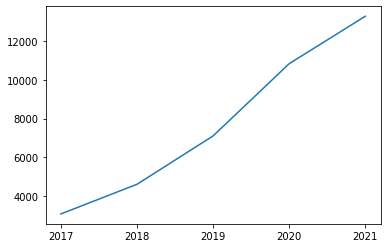

In [59]:
yearToCount = dict()
for post in postList:
  year = str(post['date'].split('-')[0])
  if year not in yearToCount.keys():
    yearToCount[year] = 0
  yearToCount[year] += 1

print(yearToCount)

x = [y for y in yearToCount.keys()]
y = [y for y in yearToCount.values()]
plt.plot(x,y)
plt.show()

{'04/2017': 259, '05/2017': 258, '03/2017': 277, '01/2017': 255, '02/2017': 206, '06/2017': 207, '08/2018': 417, '07/2018': 365, '06/2018': 345, '01/2019': 553, '12/2018': 372, '05/2018': 407, '04/2018': 356, '11/2018': 456, '10/2018': 495, '09/2018': 421, '03/2018': 396, '02/2018': 288, '01/2018': 281, '12/2017': 221, '10/2017': 279, '09/2017': 327, '08/2017': 302, '07/2017': 225, '11/2017': 247, '12/2019': 577, '01/2020': 778, '03/2020': 1003, '02/2020': 710, '11/2019': 550, '10/2019': 658, '09/2019': 718, '08/2019': 717, '07/2019': 483, '06/2019': 544, '05/2019': 635, '04/2019': 626, '03/2019': 571, '02/2019': 473, '07/2020': 841, '06/2020': 843, '05/2020': 860, '04/2020': 918, '10/2020': 1121, '09/2020': 932, '08/2020': 1057, '02/2021': 873, '01/2021': 1134, '12/2020': 909, '11/2020': 877, '06/2021': 1063, '05/2021': 1047, '04/2021': 1029, '03/2021': 994, '10/2021': 1232, '09/2021': 1230, '08/2021': 1149, '07/2021': 1160, '12/2021': 1249, '11/2021': 1147}


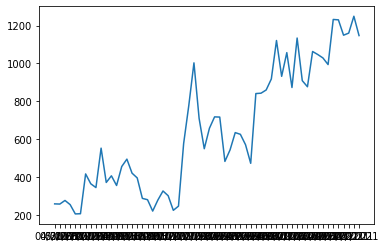

In [60]:
yearToCount = dict()
for post in postList:
  Month = str(post['date'].split('-')[1])
  year = str(post['date'].split('-')[0])
  year = Month+'/'+year
  if year not in yearToCount.keys():
    yearToCount[year] = 0
  yearToCount[year] += 1

print(yearToCount)

x = [y for y in yearToCount.keys()]
y = [y for y in yearToCount.values()]
plt.plot(x,y)
plt.show()

In [61]:
PageStats = dict()

for post in postList:
  page = post['account']['name']
  if page not in PageStats.keys():
    PageStats[page] = dict()
    PageStats[page]['subsCount'] = post['account']['subscriberCount']
    PageStats[page]['PostCount'] = 0
  PageStats[page]['PostCount'] += 1

print(PageStats)

{'Indian-American Community News': {'subsCount': 44607, 'PostCount': 190}, 'Indians in Seattle Bellevue Redmond Bothell Sammamish Kent Kirkland Renton': {'subsCount': 43948, 'PostCount': 3888}, 'Indians of Atlanta': {'subsCount': 5917, 'PostCount': 25}, "GW Indian Students' Association": {'subsCount': 1125, 'PostCount': 80}, 'Atlanta Tamil Makkal (ATM)': {'subsCount': 3610, 'PostCount': 509}, 'Indian Film Festival of Los Angeles': {'subsCount': 22632, 'PostCount': 148}, 'Kailasa Los Angeles - Nithyanandeshwara Hindu Temple': {'subsCount': 22704, 'PostCount': 1386}, 'Center for Indian Classical Music of Houston - CICMH': {'subsCount': 2003, 'PostCount': 282}, 'ISKCON Detroit - The Devasadhan Mandir': {'subsCount': 12736, 'PostCount': 3530}, 'American Indian Heritage Day in Texas': {'subsCount': 4750, 'PostCount': 3138}, 'Indians in Redmond/Bellevue/Seattle/Sammamish/Issaquah/Bothell/Kent/Kenmore': {'subsCount': 16273, 'PostCount': 1640}, 'Greater Atlanta Tamil Sangam': {'subsCount': 501

In [62]:
srt = list(sorted(PageStats.items(), key=lambda item: item[1]['subsCount'], reverse=True))

n = 10
print("Top {} channels based on subscriber count".format(n))
for i in srt[0:9]:
  print(i)

Top 10 channels based on subscriber count
('India in New York', {'subsCount': 113429, 'PostCount': 585})
('Indians @ Florida', {'subsCount': 69319, 'PostCount': 37})
('Emergency SOS Indians group (USA TO  INDIA)', {'subsCount': 44725, 'PostCount': 624})
('Indian-American Community News', {'subsCount': 44607, 'PostCount': 190})
('Indians in Seattle Bellevue Redmond Bothell Sammamish Kent Kirkland Renton', {'subsCount': 43948, 'PostCount': 3888})
('New York Bengali Society', {'subsCount': 32430, 'PostCount': 335})
('Indians In New Jersey', {'subsCount': 31057, 'PostCount': 58})
('Indians in usa', {'subsCount': 29998, 'PostCount': 92})
('Indian Community New Jersey New York', {'subsCount': 23826, 'PostCount': 122})


In [63]:
srt = list(sorted(PageStats.items(), key=lambda item: item[1]['PostCount'], reverse=True))

n = 10
print("Top {} channels based on Post count".format(n))
for i in srt[0:9]:
  print(i)

Top 10 channels based on Post count
('Indians in Seattle Bellevue Redmond Bothell Sammamish Kent Kirkland Renton', {'subsCount': 43948, 'PostCount': 3888})
('ISKCON Detroit - The Devasadhan Mandir', {'subsCount': 12736, 'PostCount': 3530})
('American Indian Heritage Day in Texas', {'subsCount': 4750, 'PostCount': 3138})
('Indians in Redmond/Bellevue/Seattle/Sammamish/Issaquah/Bothell/Kent/Kenmore', {'subsCount': 16273, 'PostCount': 1640})
('Kailasa Los Angeles - Nithyanandeshwara Hindu Temple', {'subsCount': 22704, 'PostCount': 1386})
('Indians in Houston(IiH)', {'subsCount': 15873, 'PostCount': 1117})
('Indian Association of Greater Cincinnati', {'subsCount': 9724, 'PostCount': 906})
('Indians in Austin (IiA)', {'subsCount': 10732, 'PostCount': 832})
('Indians in Austin', {'subsCount': 18641, 'PostCount': 804})


In [64]:
import statistics

stats = dict()
for post in postList:
  post = post['statistics']['actual']
  for typ in post.keys():
    if typ not in stats.keys():
      stats[typ] = []
    stats[typ].append(post[typ])

for key in stats.keys():
  print("Name - {} Mean - {} SD - {}".format(key, statistics.mean(stats[key]), statistics.pstdev(stats[key])))

Name - likeCount Mean - 30.00883796213036 SD - 320.6221781484673
Name - shareCount Mean - 7.881612414253783 SD - 62.36505519683198
Name - commentCount Mean - 11.489325077717545 SD - 23.774332295636125
Name - loveCount Mean - 4.8434344731906585 SD - 30.935779060236342
Name - wowCount Mean - 0.2710479664979575 SD - 1.4605997365493042
Name - hahaCount Mean - 0.17287978829997688 SD - 1.832149945283028
Name - sadCount Mean - 0.5005780643835265 SD - 4.529278946724412
Name - angryCount Mean - 0.25208745471828997 SD - 3.16133718852059
Name - thankfulCount Mean - 0 SD - 0.0
Name - careCount Mean - 0.20743519255966908 SD - 3.1274890383173104


In [65]:
PostStats = dict()
for post in postList:
  PostStats[post['postUrl']] = 0
  poststats = post['statistics']['actual']
  for typ in poststats.keys():
    PostStats[post['postUrl']] += poststats[typ]
srt = list(sorted(PostStats.items(), key=lambda item: item[1], reverse=True))
print(srt[0:10])

[('https://www.facebook.com/515365768619815/posts/996120790860385', 69559), ('https://www.facebook.com/160209324036106/posts/4159523117438020', 11147), ('https://www.facebook.com/160209324036106/posts/4159522927438039', 8787), ('https://www.facebook.com/160209324036106/posts/4644952432228417', 7779), ('https://www.facebook.com/160209324036106/posts/4384674471589549', 6905), ('https://www.facebook.com/160209324036106/posts/4381559521901044', 6330), ('https://www.facebook.com/groups/1503499499972678/permalink/1869622976693660', 5307), ('https://www.facebook.com/503055433070371/posts/2986417764734113', 5305), ('https://www.facebook.com/260856760733419/posts/221291453052007', 5241), ('https://www.facebook.com/503055433070371/posts/2931262740249616', 4716)]


In [66]:
from gensim.parsing.preprocessing import remove_stopwords

wordCount = dict()
txt = ""

for post in postList:
  try:
    text = post['message']
    text = re.sub(r'http\S+', '', text)
    res = re.sub(r'[^\w\s]', ' ', text)
    res = remove_stopwords(res)
    txt += res + " "
    words = res.split()
    for word in words:
      if word not in wordCount.keys() and len(word)>1:
        wordCount[word] = 0
      wordCount[word] += 1
  except:
    continue

# Most frequent n words
n = 10
dct = sorted(wordCount, key=wordCount.get, reverse=True)[:n]
for word in dct:
  print("{} - {}".format(word, wordCount[word]))

Sri - 2881
Hi - 2605
India - 2300
Indian - 2210
We - 2121
Hello - 1693
Looking - 1659
Please - 1452
The - 1336
Radha - 1155


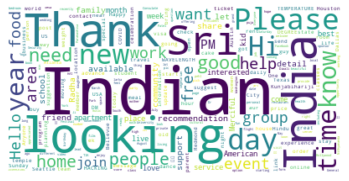

In [67]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

word_cloud = WordCloud(collocations = False, background_color = 'white', max_words=5000).generate(txt)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [68]:
URLs = dict()

for post in postList:
  try:
    post = post['expandedLinks']

    for link in post:
      url = link['original']
      if url not in URLs.keys():
        URLs[url] = 0
      URLs[url] += 1
  except:
    continue

# Most frequent n words
n = 15
dct = sorted(URLs, key=URLs.get, reverse=True)[:n]
for word in dct:
  print("{} - {}".format(word, URLs[word]))

tiny.cc/sponsorships - 129
https://chat.whatsapp.com/JIhdDyLj9twEf07Ipl1XzM - 100
https://chat.whatsapp.com/BzoZrWUszuo4csbXvRLlzx - 100
https://m.facebook.com/Iniya-Crafts-and-Jewelry-841898069169832/ - 100
https://chat.whatsapp.com/HfHnGHjQr5IAokwhYTDUM5 - 100
https://www.youtube.com/watch?v=lyIYMw5vduc - 68
https://www.youtube.com/watch?v=fBvG7wpm8Sw - 35
https://www.facebook.com/SurabhisArt/ - 34
https://www.youtube.com/watch?v=ooJSgsB5fIE - 31
www.DanceBollywood.net - 30
https://www.facebook.com/DesiBrothers.SugarLand - 29
https://restream.io/ - 28
channel:https://www.youtube.com/channel/UCvcVqyNlI_CPmUBZhGSM_Mw - 28
https://www.pinterest.com/jay_arts/_created/ - 28
www.JayArts.com - 27


In [69]:
URLs = dict()

for post in postList:
  try:
    link = post['postUrl']

    url = link
    if url not in URLs.keys():
      URLs[url] = 0
    URLs[url] += 1
  except:
    continue

# Most frequent n words
n = 15
dct = sorted(URLs, key=URLs.get, reverse=True)[:n]
for word in dct:
  print("{} - {}".format(word, URLs[word]))

https://www.facebook.com/627789777246585/posts/1810696285622589 - 2
https://www.facebook.com/groups/523547437665666/permalink/2014546181899110 - 2
https://www.facebook.com/groups/1581708418714697/permalink/2200350230183843 - 2
https://www.facebook.com/832225203546085/posts/1453706561397943 - 2
https://www.facebook.com/groups/192364347457395/permalink/2319319728095169 - 2
https://www.facebook.com/428852937493292/posts/624382301273687 - 2
https://www.facebook.com/groups/862281510551753/permalink/1693124100800819 - 2
https://www.facebook.com/groups/426121434152555/permalink/1663382980426388 - 2
https://www.facebook.com/515365768619815/posts/1146026628887056 - 2
https://www.facebook.com/260856760733419/posts/1127480814071005 - 2
https://www.facebook.com/groups/862281510551753/permalink/1648840881895808 - 2
https://www.facebook.com/groups/192096177809058/permalink/810345725984097 - 2
https://www.facebook.com/groups/465630503476607/permalink/2128670087172632 - 2
https://www.facebook.com/grou

In [70]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])


data_words = []
for post in postList:
  try:
    text = post['message']
    text = re.sub(r'http\S+', '', text)
    res = re.sub(r'[^\w\s]', ' ', text)
    res = remove_stopwords(res)
    data_word = simple_preprocess(res)
    data_word = [word for word in data_word if word not in stop_words]
    data_words.append(data_word)
  except:
    continue

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [71]:
import gensim.corpora as corpora

id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]

In [72]:
from pprint import pprint
import warnings
# number of topics
num_topics = 10
# Build LDA model
with warnings.catch_warnings():
  warnings.simplefilter("ignore")
  lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                        id2word=id2word,
                                        num_topics=num_topics)
  # Print the Keyword in the 10 topics
  pprint(lda_model.print_topics())
  doc_lda = lda_model[corpus]

[(0,
  '0.012*"temple" + 0.009*"hindu" + 0.008*"support" + 0.008*"shri" + '
  '0.008*"group" + 0.007*"free" + 0.007*"seva" + 0.006*"join" + '
  '0.006*"paramashiva" + 0.006*"like"'),
 (1,
  '0.009*"looking" + 0.008*"hi" + 0.006*"please" + 0.006*"th" + 0.006*"pm" + '
  '0.006*"old" + 0.006*"online" + 0.006*"hello" + 0.005*"school" + '
  '0.005*"thanks"'),
 (2,
  '0.008*"aur" + 0.008*"cleaning" + 0.005*"duct" + 0.005*"air" + 0.004*"day" + '
  '0.004*"para" + 0.004*"classes" + 0.004*"stlouis" + 0.004*"agrawal" + '
  '0.004*"president"'),
 (3,
  '0.020*"looking" + 0.011*"india" + 0.011*"good" + 0.010*"hi" + 0.007*"thank" '
  '+ 0.007*"apartment" + 0.007*"thanks" + 0.007*"government" + 0.007*"suggest" '
  '+ 0.007*"budget"'),
 (4,
  '0.021*"looking" + 0.011*"indian" + 0.010*"hi" + 0.010*"home" + 0.010*"know" '
  '+ 0.008*"good" + 0.008*"thanks" + 0.007*"please" + 0.007*"hello" + '
  '0.007*"food"'),
 (5,
  '0.007*"new" + 0.005*"indian" + 0.004*"help" + 0.004*"year" + 0.004*"family" '
  '+ 0

In [73]:
# Proportion of relevant topics
importantTerms = ['india', 'indian', 'american', 'government', 'dallas', 'ministry', 'people']

pres = 0
tot = 0
for post in data_words:
  tot += 1
  pres += (len([f for f in importantTerms if f in post])>0)

In [74]:
print("Fraction - {}".format(float(pres)/tot))

Fraction - 0.24968095488326703


In [75]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join(FOLDER_NAME+'lda_preped_Chinese_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, FOLDER_NAME+"LDAChinese"+ str(num_topics) +'.html')
LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.134456 -0.073660       1        1  20.282048
5      0.034096  0.070523       2        1  12.776083
8      0.119319 -0.076412       3        1  12.294876
6      0.027324  0.103854       4        1  10.602567
1      0.083921 -0.074224       5        1  10.255666
0      0.017865  0.001085       6        1   9.081814
3      0.072642 -0.100903       7        1   6.868533
2     -0.056948  0.159851       8        1   6.578611
7     -0.373636 -0.113875       9        1   5.642174
9     -0.059038  0.103762      10        1   5.617629, topic_info=          Term         Freq        Total Category  logprob  loglift
559        sri  1976.000000  1976.000000  Default  30.0000  30.0000
118    looking  5877.000000  5877.000000  Default  29.0000  29.0000
98       india  3700.000000  3700.000000  Default  28.0000  28.0000
14908       ek   867.000000   867.000000  Default  27.0000  27.0000
1247     radha   658.000000   658.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
1223        hi   123.075455  3271.384168  Topic10  -5.7503  -0.4009
120       love   114.040255  1343.754531  Topic10  -5.8266   0.4126
118    looking   117.961216  5877.001565  Topic10  -5.7928  -1.0292
400    support   107.189011  1012.338194  Topic10  -5.8885   0.6338
569    details   104.088148  1118.723609  Topic10  -5.9179   0.5046

[788 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
15735      4  0.982520       aaloo
7342       4  0.957045         aam
6628       2  0.002864  abhishekam
6628       5  0.002864  abhishekam
6628       6  0.967865  abhishekam
...      ...       ...         ...
3232       2  0.009435          கள
3232       4  0.009435          கள
3232       8  0.009435          கள
3232       9  0.962419          கள
3753       9  0.968249          பத

[2819 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 6, 9, 7, 2, 1, 4, 3, 8, 10])

#Chinese translated to english

In [76]:
!pip install google_trans_new

In [77]:
postList = []
for postF in os.listdir(FOLDER_NAME + "chinese/chinese"):
  with open(FOLDER_NAME + "chinese/chinese/"+postF) as f:
    posts = f.readlines()
    for post in posts:
      post = json.loads(post)
      for ind in post['result']['posts']:
        postList.append(ind)

In [ ]:
from google_trans_new import google_translator  

translator = google_translator()

postListTrans = []

for post in postList:
  try:
    postListTrans.append(translator.translate(post['message']))
  except:
    continue

In [ ]:
postListTrans

In [ ]:
from gensim.parsing.preprocessing import remove_stopwords

wordCount = dict()
txt = ""

for post in postListTrans:
  try:
    text = post
    text = re.sub(r'http\S+', '', text)
    res = re.sub(r'[^\w\s]', ' ', text)
    res = remove_stopwords(res)
    txt += res + " "
    words = res.split()
    for word in words:
      if word not in wordCount.keys() and len(word)>1:
        wordCount[word] = 0
      wordCount[word] += 1
  except:
    continue

# Most frequent n words
n = 10
dct = sorted(wordCount, key=wordCount.get, reverse=True)[:n]
for word in dct:
  print("{} - {}".format(word, wordCount[word]))

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

word_cloud = WordCloud(collocations = False, background_color = 'white', max_words=5000).generate(txt)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])


data_words = []
for post in postListTrans:
  try:
    text = post
    text = re.sub(r'http\S+', '', text)
    res = re.sub(r'[^\w\s]', ' ', text)
    res = remove_stopwords(res)
    data_word = simple_preprocess(res)
    data_word = [word for word in data_word if word not in stop_words]
    data_words.append(data_word)
  except:
    continue

In [ ]:
import gensim.corpora as corpora

id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
from pprint import pprint
import warnings
# number of topics
num_topics = 10

# Build LDA model
with warnings.catch_warnings():
  warnings.simplefilter("ignore")
  lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                        id2word=id2word,
                                        num_topics=num_topics)
  # Print the Keyword in the 10 topics
  pprint(lda_model.print_topics())
  doc_lda = lda_model[corpus]

In [ ]:
# Proportion of relevant topics
importantTerms = ['india', 'indian', 'american', 'government', 'dallas', 'ministry', 'people']

pres = 0
tot = 0
for post in data_words:
  tot += 1
  pres += (len([f for f in importantTerms if f in post])>0)

In [ ]:
print("Fraction - {}".format(float(pres)/tot))

In [ ]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join(FOLDER_NAME+'lda_preped_Chinese_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, FOLDER_NAME+"LDAChinese"+ str(num_topics) +'.html')
LDAvis_prepared

# Vietnamese translated to english

In [ ]:
postList = []
for postF in os.listdir(FOLDER_NAME + "vietnamese/vietnamese"):
  with open(FOLDER_NAME + "vietnamese/vietnamese/"+postF) as f:
    posts = f.readlines()
    for post in posts:
      post = json.loads(post)
      for ind in post['result']['posts']:
        postList.append(ind)

In [ ]:
from google_trans_new import google_translator  

translator = google_translator()

postListTrans = []

for post in postList:
  try:
    postListTrans.append(translator.translate(post['message']))
  except:
    continue

In [ ]:
from gensim.parsing.preprocessing import remove_stopwords

wordCount = dict()
txt = ""

for post in postListTrans:
  try:
    text = post
    text = re.sub(r'http\S+', '', text)
    res = re.sub(r'[^\w\s]', ' ', text)
    res = remove_stopwords(res)
    txt += res + " "
    words = res.split()
    for word in words:
      if word not in wordCount.keys() and len(word)>1:
        wordCount[word] = 0
      wordCount[word] += 1
  except:
    continue

# Most frequent n words
n = 10
dct = sorted(wordCount, key=wordCount.get, reverse=True)[:n]
for word in dct:
  print("{} - {}".format(word, wordCount[word]))

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

word_cloud = WordCloud(collocations = False, background_color = 'white', max_words=5000).generate(txt)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])


data_words = []
for post in postListTrans:
  try:
    text = post
    text = re.sub(r'http\S+', '', text)
    res = re.sub(r'[^\w\s]', ' ', text)
    res = remove_stopwords(res)
    data_word = simple_preprocess(res)
    data_word = [word for word in data_word if word not in stop_words]
    data_words.append(data_word)
  except:
    continue

In [ ]:
import gensim.corpora as corpora

id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
from pprint import pprint
import warnings
# number of topics
num_topics = 10
# Build LDA model
with warnings.catch_warnings():
  warnings.simplefilter("ignore")
  lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                        id2word=id2word,
                                        num_topics=num_topics)
  # Print the Keyword in the 10 topics
  pprint(lda_model.print_topics())
  doc_lda = lda_model[corpus]

In [ ]:
# Proportion of relevant topics
importantTerms = ['india', 'indian', 'american', 'government', 'dallas', 'ministry', 'people']

pres = 0
tot = 0
for post in data_words:
  tot += 1
  pres += (len([f for f in importantTerms if f in post])>0)

In [ ]:
print("Fraction - {}".format(float(pres)/tot))

In [ ]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join(FOLDER_NAME+'lda_preped_Chinese_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, FOLDER_NAME+"LDAChinese"+ str(num_topics) +'.html')
LDAvis_prepared